Isaiah Jenkins

### Intro

The California Department of Water Resources water sample dataset contains current and historical data on different chemical and physical parameters in different water sources that are regulated across the state. Two of key attributes in this dataset is the 'parameter' and the 'result'. The 'parameter' attribute contains the constituent that was measured. In addition, the 'result' attribute is a measured result of the constituent. Throughout data exploration and analysis, these key attributes will have the most impact on the quality of water running through California.


### Plan for Data Exploration

1. Explore the dataset's structure, including the number of rows, features, data types and any missing values.
2. Perform basic statistical analysis such as calculating descriptive statistics (mean, median) for numerical features and value counts for categorical features to identify potential issues like outlier.
3. Create data visualizations such as scatter plots and box plots to visually inspect the distributions and relationships between variables. 

### Data Cleaning and Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
lab_results = pd.read_csv('data/CAWaterQualityLabResults.csv', nrows=500000)

In [3]:
lab_results.head(10)

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
0,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.5617,"Public, Review Status Unknown",Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Conductance,3480,1.0,uS/cm,EPA 120.1
1,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.5617,"Public, Review Status Unknown",Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Boron,7.7,0.1,mg/L,"Std Method 4500-B, C"
2,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.5617,"Public, Review Status Unknown",Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Calcium,68,1.0,mg/L,EPA 215.2
3,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.5617,"Public, Review Status Unknown",Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Chloride,758,0.1,mg/L,"Std Method 4500-Cl, B"
4,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.5617,"Public, Review Status Unknown",Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Magnesium,59,0.1,mg/L,"Std Method 3500-Mg, E"
5,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.5617,"Public, Review Status Unknown",Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Dissolved Sodium,510,1.0,mg/L,"Std Method 3500-Na, D"
6,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.5617,"Public, Review Status Unknown",Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Total Alkalinity,270,1.0,mg/L as CaCO3,EPA 310.1
7,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.5617,"Public, Review Status Unknown",Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,Total Hardness,412,1.0,mg/L as CaCO3,EPA 130.2
8,8135,01S04E32C001M,01S04E32C001M,01S04E32C001M,Groundwater,37.8073,-121.5617,"Public, Review Status Unknown",Alameda,WDIS_0719152,05/03/1967 09:00,NaN,Feet,pH,8,0.1,pH Units,EPA 150.1
9,8166,01S04W04A001M,01S04W04A001M,01S04W04A001M,Groundwater,37.8788,-122.3027,"Public, Review Status Unknown",Alameda,WDIS_0744257,07/18/1975 09:50,NaN,Feet,Conductance,1430,1.0,uS/cm,EPA 120.1


In [4]:
lab_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   station_id          500000 non-null  int64  
 1   station_name        500000 non-null  object 
 2   full_station_name   500000 non-null  object 
 3   station_number      500000 non-null  object 
 4   station_type        500000 non-null  object 
 5   latitude            489562 non-null  float64
 6   longitude           489562 non-null  float64
 7   status              500000 non-null  object 
 8   county_name         500000 non-null  object 
 9   sample_code         500000 non-null  object 
 10  sample_date         500000 non-null  object 
 11  sample_depth        356289 non-null  float64
 12  sample_depth_units  500000 non-null  object 
 13  parameter           500000 non-null  object 
 14  result              494386 non-null  object 
 15  reporting_limit     498473 non-nul

##### Removing rows with missing values

In [5]:
lab_results.dropna(subset=['sample_depth', 'result'], inplace=True)

In [6]:
lab_results['result'] = lab_results['result'].apply(pd.to_numeric, errors='coerce')

In [7]:
lab_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 352031 entries, 11670 to 499999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   station_id          352031 non-null  int64  
 1   station_name        352031 non-null  object 
 2   full_station_name   352031 non-null  object 
 3   station_number      352031 non-null  object 
 4   station_type        352031 non-null  object 
 5   latitude            343243 non-null  float64
 6   longitude           343243 non-null  float64
 7   status              352031 non-null  object 
 8   county_name         352031 non-null  object 
 9   sample_code         352031 non-null  object 
 10  sample_date         352031 non-null  object 
 11  sample_depth        352031 non-null  float64
 12  sample_depth_units  352031 non-null  object 
 13  parameter           352031 non-null  object 
 14  result              187326 non-null  float64
 15  reporting_limit     352023 non-null

In [8]:
lab_results.dropna(subset=['result'], inplace=True)

In [9]:
lab_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 187326 entries, 11670 to 499999
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   station_id          187326 non-null  int64  
 1   station_name        187326 non-null  object 
 2   full_station_name   187326 non-null  object 
 3   station_number      187326 non-null  object 
 4   station_type        187326 non-null  object 
 5   latitude            184215 non-null  float64
 6   longitude           184215 non-null  float64
 7   status              187326 non-null  object 
 8   county_name         187326 non-null  object 
 9   sample_code         187326 non-null  object 
 10  sample_date         187326 non-null  object 
 11  sample_depth        187326 non-null  float64
 12  sample_depth_units  187326 non-null  object 
 13  parameter           187326 non-null  object 
 14  result              187326 non-null  float64
 15  reporting_limit     187325 non-null

##### Looking for correlations, no correlations found

In [10]:
lab_nums = lab_results.select_dtypes(include=['int64', 'float64'])
lab_nums_corr = lab_nums.corr()['result'][:-1]
top_features = lab_nums_corr[abs(lab_nums_corr) > 0.5].sort_values(ascending=False)
top_features

result    1.0
Name: result, dtype: float64

##### Log Transformation

This visualization for the target, 'results', is positively skewed since it has a longer tail to the right. The result target will be normally distributed for better visualization in order to see the relationship between different physical parameters.

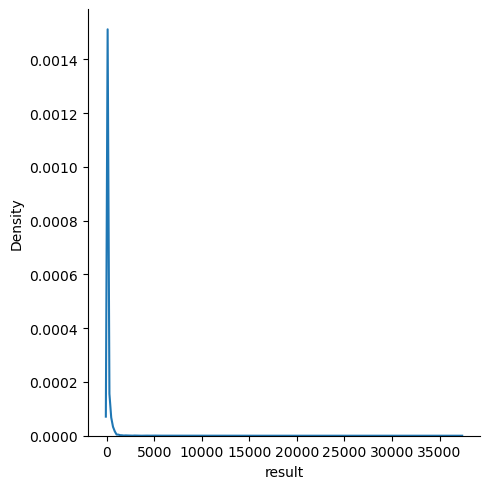

In [11]:
results_untransformed = sns.displot(lab_results['result'], kind='kde')

##### Highly skewed since it's over 1

In [12]:
print("Skewness: %f" % lab_results['result'].skew())

Skewness: 42.320502


##### Unskew the result data for a more normal distribution

In [13]:
log_transformed = np.log(lab_results['result'])

/Users/isaiahjenkins/Documents/IBM Cert Coursework/Projects/WaterQualityAnalysis/env/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


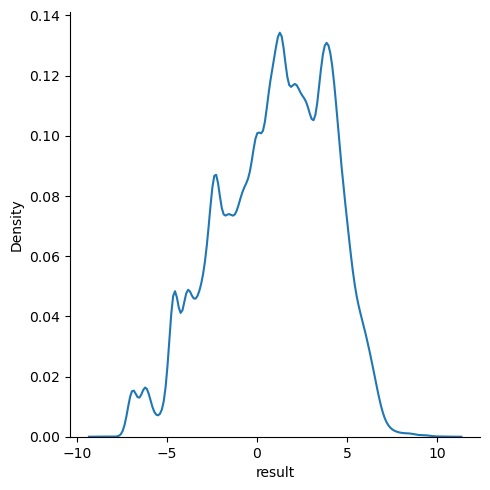

In [14]:
new_displot = sns.displot(log_transformed, kind='kde')

##### Handling duplicates

There are duplicate stations across California with different samples of physical properties found in the water.
First, I will find duplicates of physical properties based the grouping of 'stationids'.

##### Searching for duplicates

In [15]:
found_duplicates = lab_results[lab_results.duplicated(['station_id', 'parameter'], keep=False)]
found_duplicates

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
11670,116,OLDRIVDMC,Old River U/S from DMC Intake,B9D74891331,Surface Water,37.8149,-121.5527,"Public, Review Status Unknown",Alameda,C0191A0020,01/02/1991 13:30,1.0,Meters,Bromodichloromethane,240.00,10.00,ug/L,DWR THMFP (Original)
11672,116,OLDRIVDMC,Old River U/S from DMC Intake,B9D74891331,Surface Water,37.8149,-121.5527,"Public, Review Status Unknown",Alameda,C0191A0020,01/02/1991 13:30,1.0,Meters,Chloroform,530.00,10.00,ug/L,DWR THMFP (Original)
11673,116,OLDRIVDMC,Old River U/S from DMC Intake,B9D74891331,Surface Water,37.8149,-121.5527,"Public, Review Status Unknown",Alameda,C0191A0020,01/02/1991 13:30,1.0,Meters,Conductance,740.00,1.00,uS/cm@25 °C,EPA 120.1
11674,116,OLDRIVDMC,Old River U/S from DMC Intake,B9D74891331,Surface Water,37.8149,-121.5527,"Public, Review Status Unknown",Alameda,C0191A0020,01/02/1991 13:30,1.0,Meters,Dibromochloromethane,120.00,10.00,ug/L,DWR THMFP (Original)
11675,116,OLDRIVDMC,Old River U/S from DMC Intake,B9D74891331,Surface Water,37.8149,-121.5527,"Public, Review Status Unknown",Alameda,C0191A0020,01/02/1991 13:30,1.0,Meters,Dissolved Bromide,0.46,0.01,mg/L,EPA 300.0 28d Hold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",Contra Costa,WDIS_0906511,12/06/1978 13:00,3.0,Feet,Total Organic Nitrogen,0.30,0.10,mg/L as N,EPA 351.2 (DWR Modified)
499996,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",Contra Costa,WDIS_0906511,12/06/1978 13:00,3.0,Feet,Total Phosphorus,0.12,0.01,mg/L as P,EPA 365.4 (DWR Modified)
499997,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",Contra Costa,WDIS_0906511,12/06/1978 13:00,3.0,Feet,Turbidity,14.00,1.00,N.T.U.,"Turbidity, Hach"
499998,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",Contra Costa,WDIS_0906511,12/06/1978 13:00,3.0,Feet,Volatile Suspended Solids,2.00,1.00,mg/L,EPA 160.4


After searching for duplicates and through further analysis, keeping  duplicates of samples per station will provide a good amount of data to analyze from such as taking the mean or median of different 'parameters' (constituents). Thus, in order to improve water quality accuracy, duplicates for constituents would be necessary.

##### Handling missing values

Text(0.5, 1.0, 'Total Missing Values')

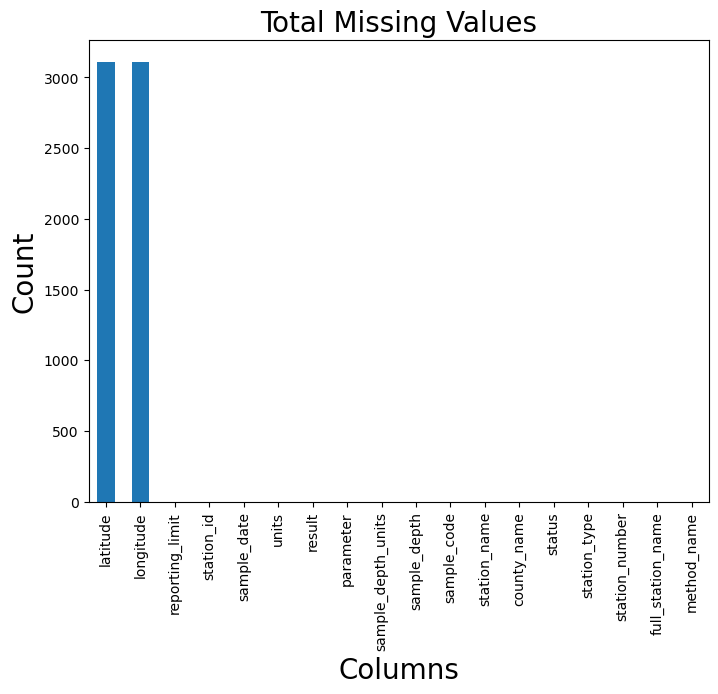

In [16]:
total = lab_results.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind='bar', figsize=(8, 6), fontsize=10)

plt.xlabel('Columns', fontsize='20')
plt.ylabel('Count', fontsize='20')
plt.title('Total Missing Values', fontsize='20')

##### Feature Scaling

In [17]:
norm_data = MinMaxScaler().fit_transform(lab_nums)
norm_data

array([[2.23116542e-03, 2.31404282e-01, 3.98954052e-03, 2.67141583e-03,
        6.46268537e-03, 1.00000000e-02],
       [2.23116542e-03, 2.31404282e-01, 3.98954052e-03, 2.67141583e-03,
        1.42393607e-02, 1.00000000e-02],
       [2.23116542e-03, 2.31404282e-01, 3.98954052e-03, 2.67141583e-03,
        1.98707463e-02, 1.00000000e-03],
       ...,
       [9.57524449e-01, 3.09491969e-01, 3.73494134e-03, 6.62906894e-03,
        4.02241828e-04, 1.00000000e-03],
       [9.57524449e-01, 3.09491969e-01, 3.73494134e-03, 6.62906894e-03,
        8.04483656e-05, 1.00000000e-03],
       [9.57524449e-01, 3.09491969e-01, 3.73494134e-03, 6.62906894e-03,
        3.11067013e-05, 1.00000000e-05]])

In [18]:
scaled_data = StandardScaler().fit_transform(lab_nums)
scaled_data

array([[-0.80702832, -0.99392693, -0.0681318 , -0.12227291,  0.51728008,
         0.55730916],
       [-0.80702832, -0.99392693, -0.0681318 , -0.12227291,  1.3237362 ,
         0.55730916],
       [-0.80702832, -0.99392693, -0.0681318 , -0.12227291,  1.90772167,
        -0.01633848],
       ...,
       [ 1.25888407, -0.72132306, -0.07160548, -0.03068538, -0.11119953,
        -0.01633848],
       [ 1.25888407, -0.72132306, -0.07160548, -0.03068538, -0.14457013,
        -0.01633848],
       [ 1.25888407, -0.72132306, -0.07160548, -0.03068538, -0.14968695,
        -0.07943972]])

##### Handling Outliers

Finding all the pH of samples and doing a univariate analysis on that parameter

<Axes: xlabel='result'>

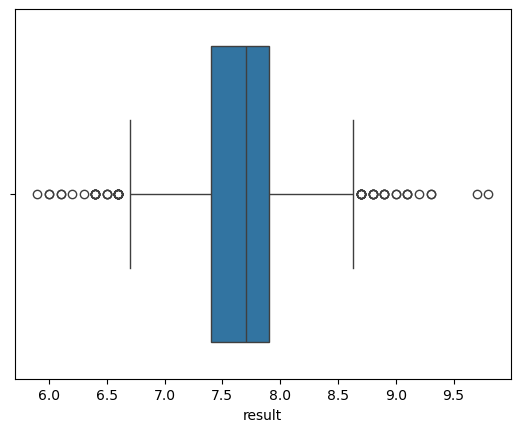

In [19]:
sns.boxplot(x=lab_results.loc[lab_results['parameter'] == 'pH', 'result'])

Through further analysis of the physical property involving the pH levels should not be removed. Samples from different counties can have an impact on the quality of our water in different parts of the California.

##### Feature Engineering

A core categorical feature to focus on would be 'county_name' because each county has different samples. Every sample has an impact on the pH level and quality of water.

In [20]:
lab_results['county_name'].unique().tolist()

['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa', 'Contra Costa']

##### Utlizing One Hot Encoder to make categorical data numerical

In [21]:
lab_results_pH = lab_results[(lab_results['parameter'] == 'pH') & (lab_results['sample_depth_units'] == 'Feet')]
new_results_pH = pd.get_dummies(data=lab_results_pH, columns=['county_name'])
new_results_pH

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,sample_code,sample_date,...,result,reporting_limit,units,method_name,county_name_Alameda,county_name_Alpine,county_name_Amador,county_name_Butte,county_name_Calaveras,county_name_Contra Costa
13384,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,-121.7494,"Public, Review Status Unknown",OM0298A0046,02/18/1998 12:34,...,8.1,0.1,pH Units,EPA 150.1,True,False,False,False,False,False
13419,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,-121.7494,"Public, Review Status Unknown",OM0297A0065,02/19/1997 10:35,...,7.8,0.1,pH Units,EPA 150.1,True,False,False,False,False,False
14126,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,-121.7494,"Public, Review Status Unknown",OM0398A0069,03/18/1998 12:34,...,8.2,0.1,pH Units,EPA 150.1,True,False,False,False,False,False
15464,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,-121.7494,"Public, Review Status Unknown",OM0697A0231,06/18/1997 12:00,...,7.8,0.1,pH Units,EPA 150.1,True,False,False,False,False,False
15902,259,Del Valle COW,Del Valle Conserv. Outlet Works,DV000000,Surface Water,37.6183,-121.7494,"Public, Review Status Unknown",OM0885A0375,08/05/1985 11:10,...,6.4,0.1,pH Units,EPA 150.1,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499629,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",WDIS_0906395,10/17/1972 16:25,...,7.6,0.1,pH Units,EPA 150.1,False,False,False,False,False,True
499762,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",WDIS_0906413,10/30/1973 10:55,...,7.6,0.1,pH Units,Std Method 2120 B,False,False,False,False,False,True
499853,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",WDIS_0906396,11/15/1972 13:40,...,7.6,0.1,pH Units,EPA 150.1,False,False,False,False,False,True
499870,45929,D19,D19 - Frank's Tract near Russo's Landing,B9D80261369,Surface Water,38.0438,-121.6148,"Public, Review Status Unknown",WDIS_0906381,11/16/1971 16:45,...,7.8,0.1,pH Units,UnkMod Alkalinity,False,False,False,False,False,True


##### Feature Selection

In [22]:
new_results_pH.columns

Index(['station_id', 'station_name', 'full_station_name', 'station_number',
       'station_type', 'latitude', 'longitude', 'status', 'sample_code',
       'sample_date', 'sample_depth', 'sample_depth_units', 'parameter',
       'result', 'reporting_limit', 'units', 'method_name',
       'county_name_Alameda', 'county_name_Alpine', 'county_name_Amador',
       'county_name_Butte', 'county_name_Calaveras',
       'county_name_Contra Costa'],
      dtype='object')

In [23]:
new_results_pH.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 13384 to 499971
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   station_id                1305 non-null   int64  
 1   station_name              1305 non-null   object 
 2   full_station_name         1305 non-null   object 
 3   station_number            1305 non-null   object 
 4   station_type              1305 non-null   object 
 5   latitude                  1305 non-null   float64
 6   longitude                 1305 non-null   float64
 7   status                    1305 non-null   object 
 8   sample_code               1305 non-null   object 
 9   sample_date               1305 non-null   object 
 10  sample_depth              1305 non-null   float64
 11  sample_depth_units        1305 non-null   object 
 12  parameter                 1305 non-null   object 
 13  result                    1305 non-null   float64
 14  reporti

In [24]:
x = new_results_pH.loc[:, ['latitude', 'longitude', 'sample_depth', 'result', 'county_name_Alameda', 'county_name_Alpine', 'county_name_Amador', 'county_name_Butte', 'county_name_Calaveras', 'county_name_Contra Costa']]

In [25]:
y = new_results_pH.result

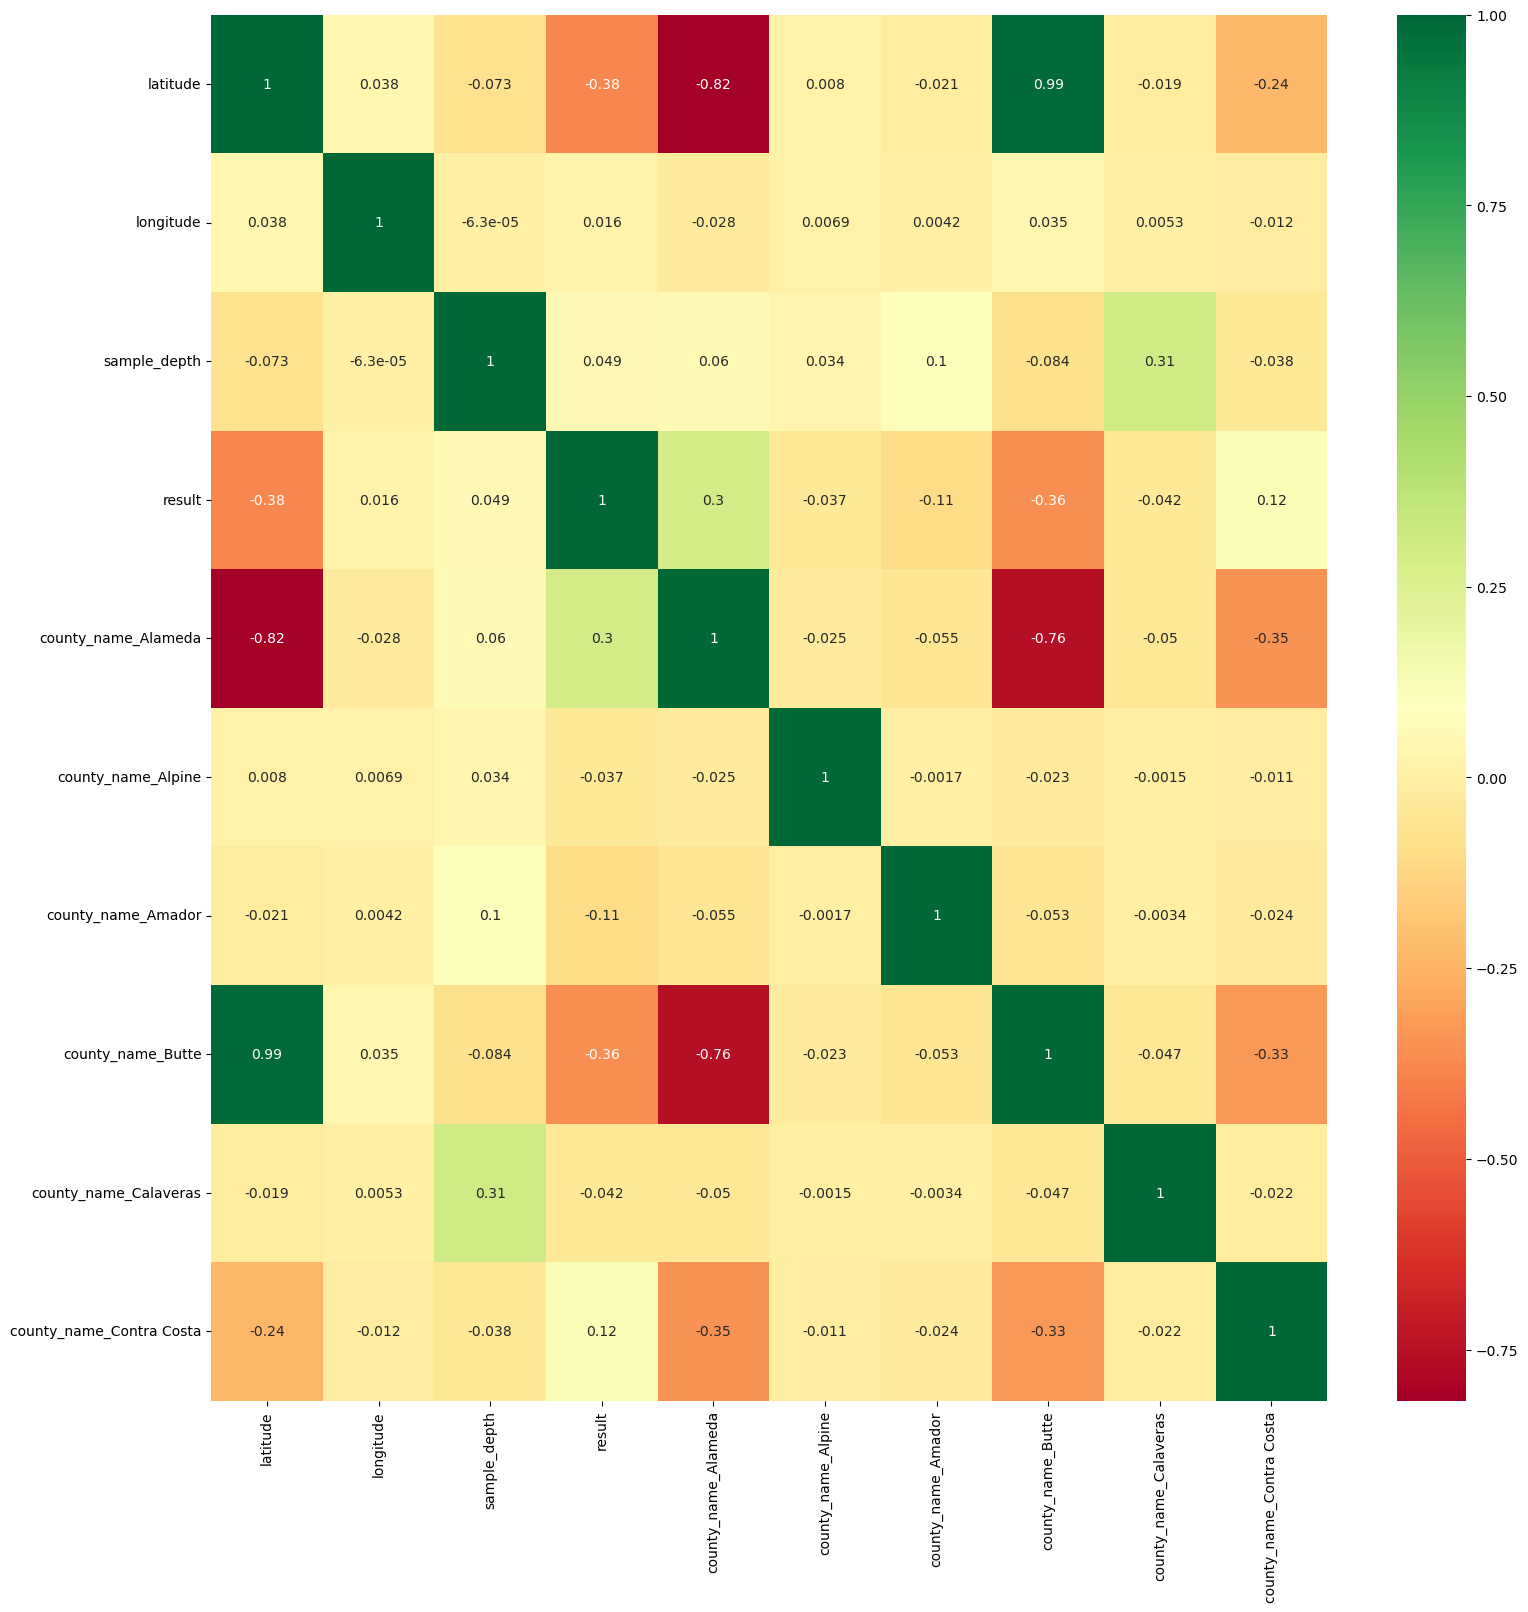

In [26]:
plt.figure(figsize=(18,18))
sns.heatmap(x.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [27]:
features = x.corr()['result'].sort_values()
features

latitude                   -0.382987
county_name_Butte          -0.358827
county_name_Amador         -0.107072
county_name_Calaveras      -0.042186
county_name_Alpine         -0.036616
longitude                   0.016030
sample_depth                0.048896
county_name_Contra Costa    0.117397
county_name_Alameda         0.296502
result                      1.000000
Name: result, dtype: float64

<Axes: >

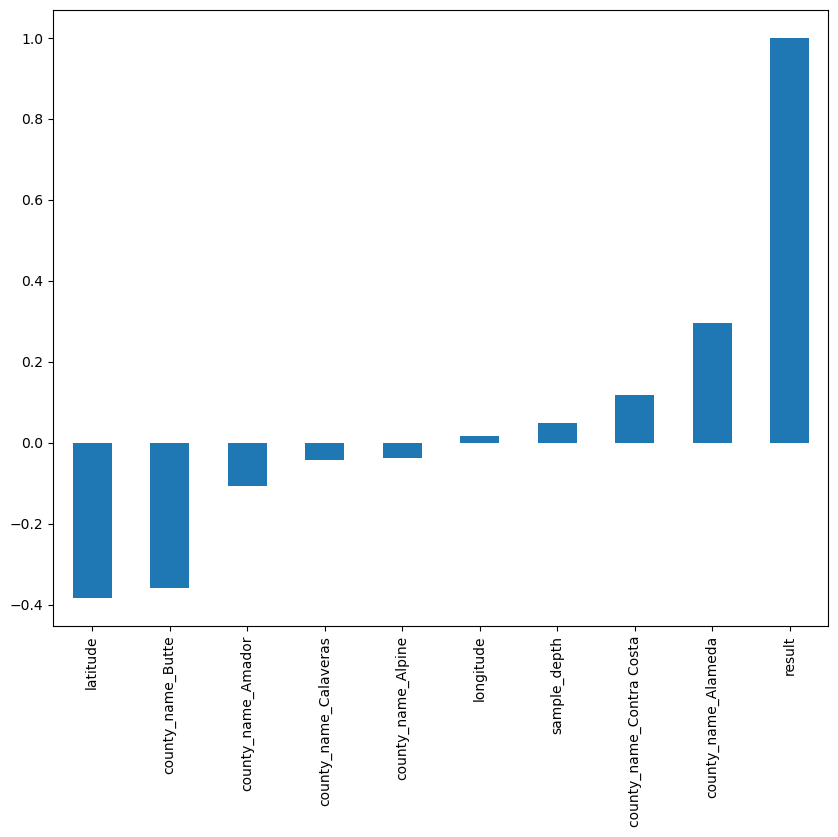

In [28]:
features.plot(kind='bar',figsize=(10,8))

### Key Findings and Insights
Throughout exploring water samples gathering by California Department of Water Resources I found many different physical parameters that affected the water quality. After utilizing data wrangling and visualization, I learned that narrowing down to the most important features allow for the most impact on the quality of water. I found that filtering on the pH parameter was the most critical physical parameter because it determines level of alkalinity or acidity. 

### Three Hypothesis

1.
* Null - There is no difference due to the pH level being acidic due to sample depth, just random occurrence.
* Alternative - There is a difference do the pH level being acidic due to an increase in sample depth.

2.
* Null - There is no difference due to the pH level being acidic, just random occurrence.
* Alternative - There is a difference do the pH level being acidic due to different county.

3.
* Null - There is no difference due to the pH level being acidic, just random occurrence.
* Alternative - There is a difference do the pH level being acidic due to different geo-location of longitude and latitude.


### Significance test on sample depth

* Null - There is no difference due to the pH level being acidic due to sample depth, just random occurrence.
* Alternative - There is a difference that the pH level being acidic due to an increase in sample depth

In [29]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1305 entries, 13384 to 499971
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  1305 non-null   float64
 1   longitude                 1305 non-null   float64
 2   sample_depth              1305 non-null   float64
 3   result                    1305 non-null   float64
 4   county_name_Alameda       1305 non-null   bool   
 5   county_name_Alpine        1305 non-null   bool   
 6   county_name_Amador        1305 non-null   bool   
 7   county_name_Butte         1305 non-null   bool   
 8   county_name_Calaveras     1305 non-null   bool   
 9   county_name_Contra Costa  1305 non-null   bool   
dtypes: bool(6), float64(4)
memory usage: 58.6 KB


##### Narrowing county to Alameda to analyze sample depth pH levels
This is the county where I live. Thus, the analysis will be focused on more relevant data to me.

In [30]:
alameda_results = x[x['county_name_Alameda'] == True].sort_values('sample_depth')
max_depths = alameda_results.head(50)
min_depths = alameda_results.tail(50)

In [31]:
max_depths_pH = max_depths.result
min_depths_pH = min_depths.result

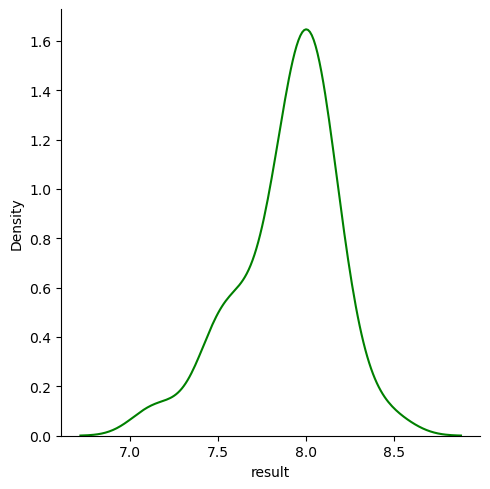

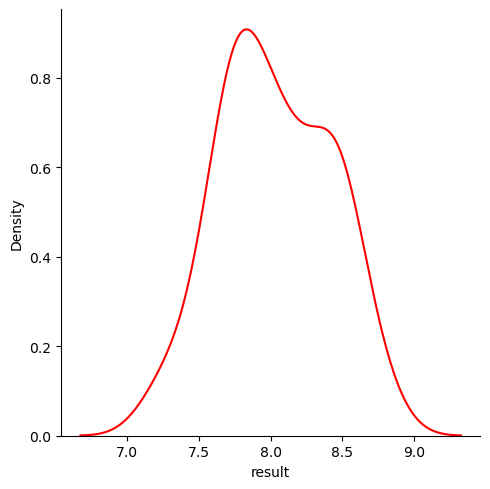

In [32]:
sns.displot(max_depths_pH, kind="kde", color='green')
sns.displot(min_depths_pH, kind="kde", color='red')

In [33]:
max_depths_pH.mean()

7.896

In [34]:
min_depths_pH.mean()

8.030000000000001

In [35]:
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(max_depths_pH, min_depths_pH)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  -1.9994410443726776 , p_value1 =  0.04832920857815798


In [36]:
if p_value1 < alpha:
    print('The p value {} is below the alpha {}'.format(p_value1, alpha))
    print('Conclusion: We will incorrectly reject the null. Thus, there is no difference due to the pH level being acidic due to sample depth')
else:
    print('The p value {} is below the alpha {}'.format(p_value1, alpha))
    print('Conclusion: We will incorrectly accept the null hypothesis. Thus, is a difference that the pH level being acidic due to an increase in sample depth.')

The p value 0.04832920857815798 is below the alpha 0.05
Conclusion: We will incorrectly reject the null. Thus, there is no difference due to the pH level being acidic due to sample depth


### Next steps in analysis



After analysis of Alameda pH levels, it would be worth analyzing other counties across California to determine if sample depth causes on higher acidic pH level. In addition, it would be ideal to filter the station's type variable, type of water such as surface water and groundwater. This would be an important when testing the different pH levels in the different types of water because we want as much relevant data for accuracy as possible.

### Summary of dataset

Overall, the California Department of Water Resources has extensive variables for analyzing the different physical properties in samples of water across different counties. The analysis revealed that different sample depths had no difference in pH levels by narrowing down the analysis to water samples in one county. These insights can offer useful information for actions taken to help improve water quality. Future analyses could explore different sample depths from more counties other across California to get more in depth insights on the pH levels in water samples.